In [59]:
%matplotlib inline
import pandas as pd
import cx_Oracle as oci
import matplotlib.pyplot as plt

conn = oci.connect('admin/1234@192.168.99.100:32764/xe',encoding='utf-8')
df_taxi = pd.read_sql_query('SELECT * FROM TAXI',conn)
df_week = pd.read_sql_query('SELECT * FROM FP_WEEK',conn)
df_time = pd.read_sql_query('SELECT * FROM FP_TIME',conn)
df_bus = pd.read_sql_query('SELECT * FROM BUS',conn)
df_taxi.columns = ['No','기준년월일','요일','시간대','발신지_시도','발신지_시군구','발신지_읍면동','통화건수']
df_week.columns = ['No','연도','월','요일','시군구','읍면동','유동인구']
df_time.columns = ['No','연도','월','시간','시군구','유동인구']


In [62]:
# 전체 시간 
all_time_total = pd.DataFrame()


all_time_t = df_time.groupby('시군구').mean()['유동인구']

all_time = df_taxi.groupby('발신지_시군구').sum()['통화건수']

all_time_total['유동인구'] = all_time_t
all_time_total['통화건수'] = all_time


In [3]:
# 퇴근 시간
night_total = pd.DataFrame()

df_taxi_n = df_taxi[(df_taxi['시간대'] == 18) | (df_taxi['시간대'] == 19) | (df_taxi['시간대'] == 20)]
night_m = df_taxi_n.groupby('발신지_시군구').sum()['통화건수']

df_time_n = df_time[(df_time['시간'] == 18) | (df_time['시간'] == 19) | (df_time['시간'] == 20)]
night_m_t = df_time_n.groupby('시군구').mean()['유동인구']

night_total['유동인구'] = night_m_t
night_total['통화건수'] = night_m


In [4]:
# 출근 시간
morning_total=pd.DataFrame()

df_taxi_m = df_taxi[(df_taxi['시간대'] == 7) | (df_taxi['시간대'] == 8) | (df_taxi['시간대'] == 9)]
morning_m = df_taxi_m.groupby('발신지_시군구').sum()['통화건수']

df_time_m = df_time[(df_time['시간'] == 7) | (df_time['시간'] == 8) | (df_time['시간'] == 9)]
morning_m_t = df_time_m.groupby('시군구').mean()['유동인구']

morning_total['유동인구'] = morning_m_t
morning_total['통화건수'] = morning_m

In [29]:
from matplotlib import font_manager
from matplotlib import rc

font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

Text(0.5, 1.0, '지역구에 따른 콜택시 통화건수 총합 : 출근 시간대')

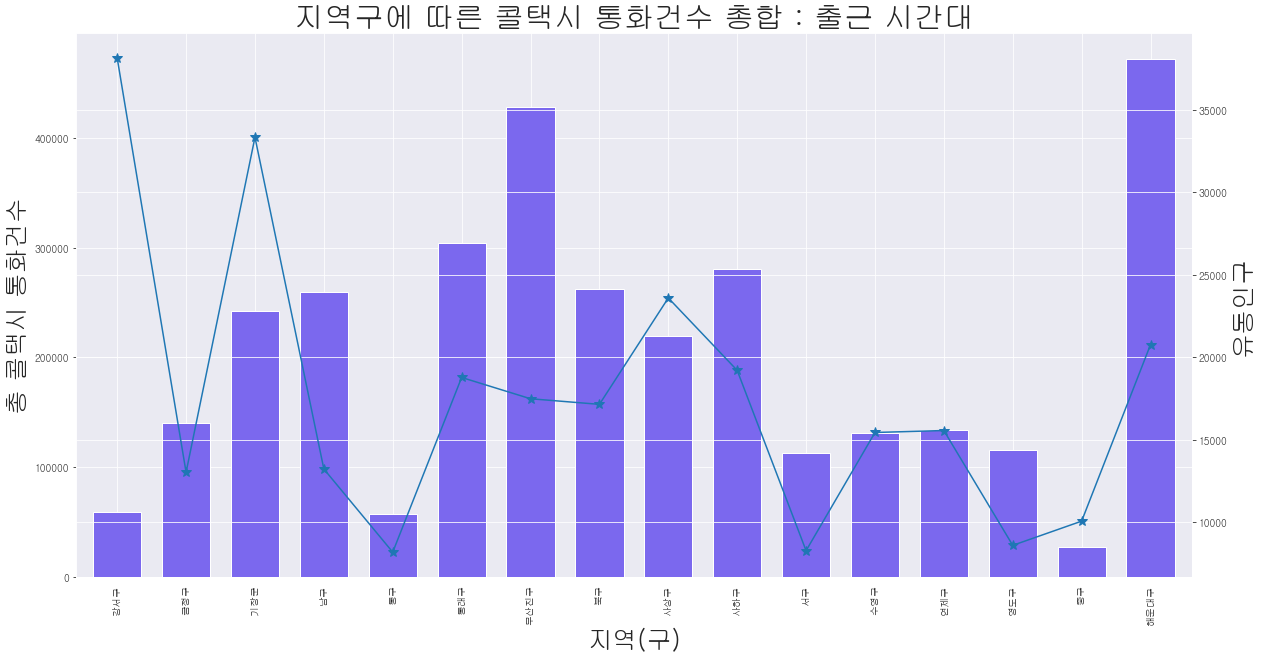

In [30]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1 = morning_m.plot(kind='bar',figsize=(20,10),width=0.7,color ='mediumslateblue')
ax2 = ax1.twinx()
ax2.plot(morning_m_t,marker='*',markersize=10)
plt.xticks(rotation=45)
ax1.set_xlabel('지역(구)', size=25)
ax1.set_ylabel('총 콜택시 통화건수',size=25)
ax2.set_ylabel('유동인구',size=25)

plt.title('지역구에 따른 콜택시 통화건수 총합 : 출근 시간대',size=30)

Text(0.5, 1.0, '지역구에 따른 콜택시 통화건수 총합 : 퇴근 시간대')

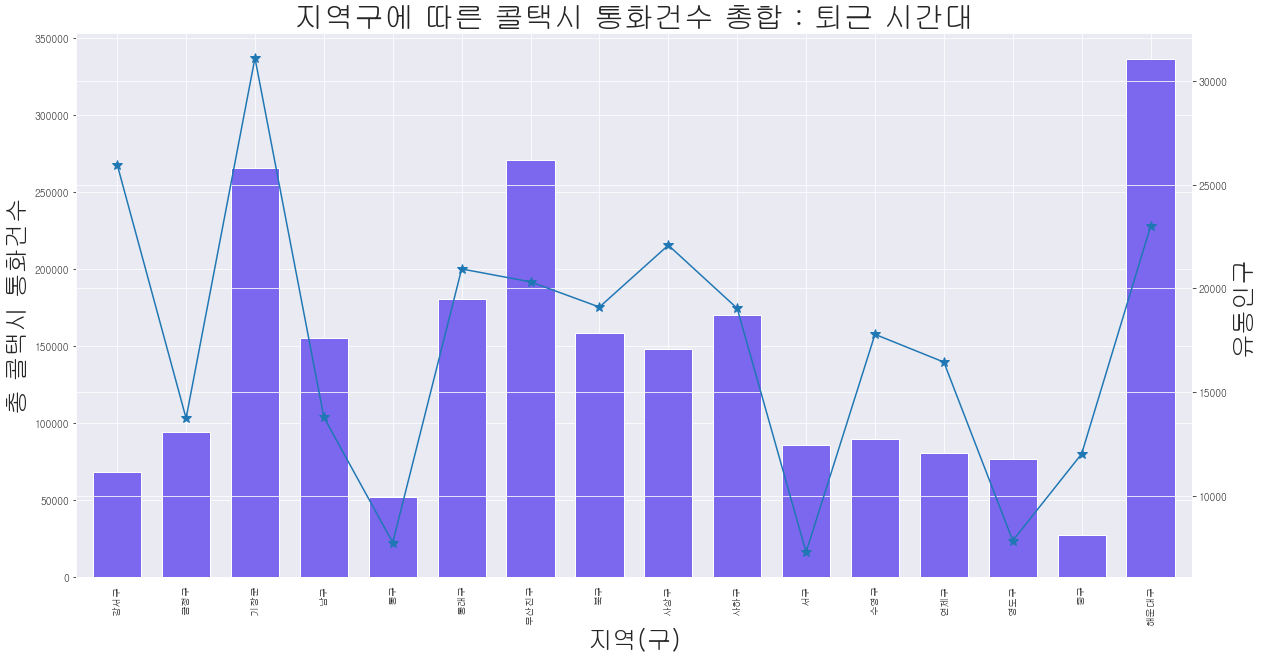

In [31]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1 = night_m.plot(kind='bar',figsize=(20,10),width=0.7,color ='mediumslateblue')
ax2 = ax1.twinx()
ax2.plot(night_m_t,marker='*',markersize=10)
plt.xticks(rotation=45)
ax1.set_xlabel('지역(구)', size=25)
ax1.set_ylabel('총 콜택시 통화건수',size=25)
ax2.set_ylabel('유동인구',size=25)

plt.title('지역구에 따른 콜택시 통화건수 총합 : 퇴근 시간대',size=30)

In [8]:
morning_total

,유동인구,통화건수
시군구,,
강서구,38125.244552,59262
금정구,13029.085869,140648
기장군,33322.885245,242475
남구,13226.836526,259813
동구,8189.684530,57698
동래구,18772.568679,304233
부산진구,17482.949379,428752
북구,17144.122013,262261
사상구,23589.145068,219318


In [9]:
night_total

,유동인구,통화건수
시군구,,
강서구,25983.625828,68263
금정구,13733.330575,93981
기장군,31130.750708,265507
남구,13783.608250,154971
동구,7730.693893,51809
동래구,20943.972177,180595
부산진구,20321.010382,270459
북구,19102.626748,158139
사상구,22091.304979,148093


In [10]:
morning_total_1 = morning_total.drop(['강서구','기장군'])
morning_total_1

,유동인구,통화건수
시군구,,
금정구,13029.085869,140648
남구,13226.836526,259813
동구,8189.684530,57698
동래구,18772.568679,304233
부산진구,17482.949379,428752
북구,17144.122013,262261
사상구,23589.145068,219318
사하구,19202.348113,280307
서구,8280.623832,112800


In [11]:
corr_1 = lambda p : p['유동인구'].corr(p['통화건수'])
re = corr_1(morning_total)
print('출근 시간대 유동인구와 통화건수의 상관계수 : ',re )

corr_1 = lambda p : p['유동인구'].corr(p['통화건수'])
re = corr_1(morning_total_1)
print('출근 시간대 유동인구와 통화건수의 상관계수 (강서구,기장군 제외) : ',re )

출근 시간대 유동인구와 통화건수의 상관계수 :  0.21012048222397245
출근 시간대 유동인구와 통화건수의 상관계수 (강서구,기장군 제외) :  0.7175624514306661


In [12]:
night_total

,유동인구,통화건수
시군구,,
강서구,25983.625828,68263
금정구,13733.330575,93981
기장군,31130.750708,265507
남구,13783.608250,154971
동구,7730.693893,51809
동래구,20943.972177,180595
부산진구,20321.010382,270459
북구,19102.626748,158139
사상구,22091.304979,148093


In [13]:
night_total_1 = night_total.drop(['강서구','기장군'])
night_total_1

,유동인구,통화건수
시군구,,
금정구,13733.330575,93981
남구,13783.608250,154971
동구,7730.693893,51809
동래구,20943.972177,180595
부산진구,20321.010382,270459
북구,19102.626748,158139
사상구,22091.304979,148093
사하구,19040.232942,170303
서구,7267.394531,85873


In [15]:
corr_1 = lambda p : p['유동인구'].corr(p['통화건수'])
re = corr_1(night_total)
print('퇴근 시간대 유동인구와 통화건수의 상관계수 : ',re )

corr_1 = lambda p : p['유동인구'].corr(p['통화건수'])
re = corr_1(night_total_1)
print('퇴근 시간대 유동인구와 통화건수의 상관계수 (강서구,기장군 제외) : ',re )

퇴근 시간대 유동인구와 통화건수의 상관계수 :  0.6312916179761656
퇴근 시간대 유동인구와 통화건수의 상관계수 (강서구,기장군 제외) :  0.7355003562009688


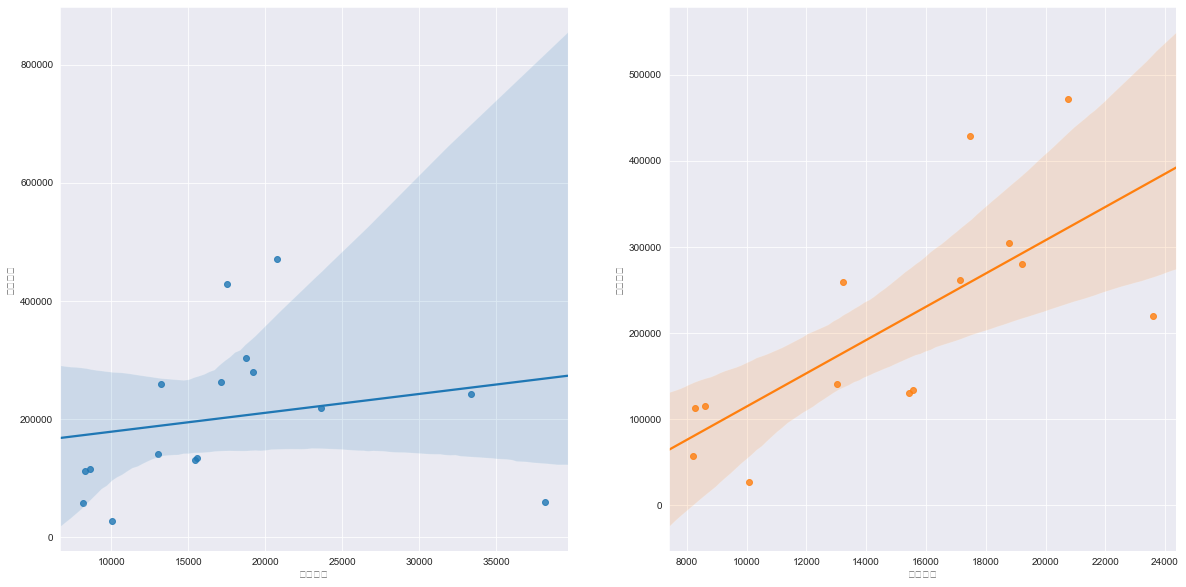

In [20]:
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='유동인구',
           y='통화건수',
           data=morning_total,
           ax=ax1)

sns.regplot(x='유동인구',
           y='통화건수',
           data=morning_total_1,
           ax=ax2)
plt.show()

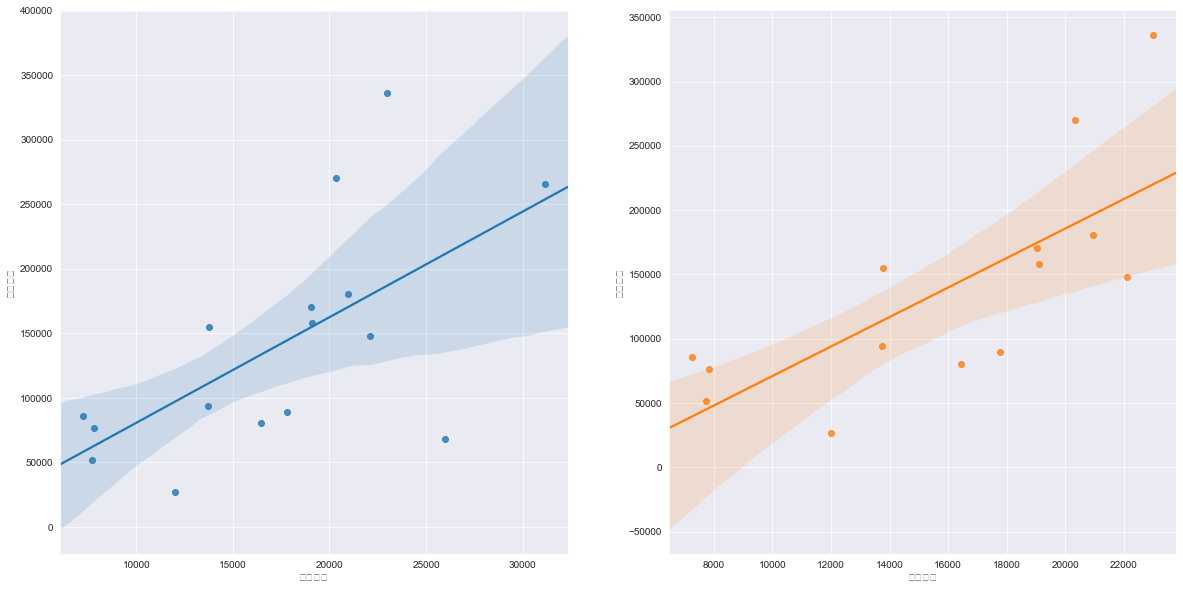

In [58]:
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='유동인구',
           y='통화건수',
           data=night_total,
           ax=ax1)


sns.regplot(x='유동인구',
           y='통화건수',
           data=night_total_1,
           ax=ax2)
plt.show()

In [36]:
df_bus_1 = df_bus['운행횟수']
df_bus_1
morning_total['운행횟수'] = df_bus_1
morning_total

,유동인구,통화건수,운행횟수
시군구,,,
강서구,38125.244552,59262,1114
금정구,13029.085869,140648,914
기장군,33322.885245,242475,1801
남구,13226.836526,259813,733
동구,8189.684530,57698,657
동래구,18772.568679,304233,928
부산진구,17482.949379,428752,1396
북구,17144.122013,262261,810
사상구,23589.145068,219318,1156


In [37]:
df_bus_1 = df_bus['운행횟수']
df_bus_1
night_total['운행횟수'] = df_bus_1
night_total

,유동인구,통화건수,운행횟수
시군구,,,
강서구,25983.625828,68263,1114
금정구,13733.330575,93981,914
기장군,31130.750708,265507,1801
남구,13783.608250,154971,733
동구,7730.693893,51809,657
동래구,20943.972177,180595,928
부산진구,20321.010382,270459,1396
북구,19102.626748,158139,810
사상구,22091.304979,148093,1156


In [41]:
morning_total.corr()

,유동인구,통화건수,운행횟수
유동인구,1.000000,0.210120,0.699092
통화건수,0.210120,1.000000,0.657952
운행횟수,0.699092,0.657952,1.000000


In [42]:
night_total.corr()

,유동인구,통화건수,운행횟수
유동인구,1.000000,0.631292,0.775880
통화건수,0.631292,1.000000,0.835771
운행횟수,0.775880,0.835771,1.000000


In [76]:
df_bus1 = df_bus.dropna()
df_bus1 = df_bus1.groupby('시군구').sum()
df_bus1 = df_bus1.drop(['거제시','김해시','양산시','창원시 진해구'])
df_bus2 = df_bus.drop_duplicates(['버스번호','시군구']).groupby('시군구').mean()
df_bus2 = df_bus2.drop(['거제시','김해시','양산시','창원시 진해구','울주군'])
all_time_total2 = all_time_total
all_time_total2['운행횟수'] = df_bus1['운행횟수']
all_time_total2

,유동인구,통화건수,운행횟수
시군구,,,
강서구,28820.837237,423338,39128.780105
금정구,13501.004817,749021,82742.892114
기장군,31200.710942,1543863,72350.819277
남구,13958.652876,1156736,85372.164835
동구,7868.249688,377180,67149.307923
동래구,20218.064211,1405954,91038.622210
부산진구,20165.192772,2012629,176431.821361
북구,18141.659478,1216579,82298.290363
사상구,22610.415652,1146595,130517.899219


In [77]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
result_m = sm.ols(formula = '통화건수 ~ 운행횟수 + 유동인구', data = all_time_total).fit()
print(result_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   통화건수   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     23.35
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           4.97e-05
Time:                        20:55:26   Log-Likelihood:                -222.75
No. Observations:                  16   AIC:                             451.5
Df Residuals:                      13   BIC:                             453.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.799e+05   2.57e+05     -2.260      0.0

In [45]:
result_m = sm.ols(formula = '통화건수 ~ 운행횟수', data = morning_total).fit()
print(result_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   통화건수   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     10.69
Date:                Mon, 13 Jan 2020   Prob (F-statistic):            0.00560
Time:                        14:25:01   Log-Likelihood:                -205.95
No. Observations:                  16   AIC:                             415.9
Df Residuals:                      14   BIC:                             417.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.181e+04   7.04e+04     -0.168      0.8

In [46]:
result_m = sm.ols(formula = '유동인구 ~ 운행횟수', data = morning_total).fit()
print(result_m.summary())

                            OLS Regression Results                            
Dep. Variable:                   유동인구   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     13.38
Date:                Mon, 13 Jan 2020   Prob (F-statistic):            0.00258
Time:                        14:26:02   Log-Likelihood:                -161.56
No. Observations:                  16   AIC:                             327.1
Df Residuals:                      14   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2552.3058   4390.105      0.581      0.5

In [48]:
result_n = sm.ols(formula = '통화건수 ~ 운행횟수 + 유동인구', data = night_total).fit()
print(result_n.summary())

                            OLS Regression Results                            
Dep. Variable:                   통화건수   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     15.11
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           0.000406
Time:                        14:33:49   Log-Likelihood:                -194.68
No. Observations:                  16   AIC:                             395.4
Df Residuals:                      13   BIC:                             397.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.188e+04   3.83e+04     -1.093      0.2

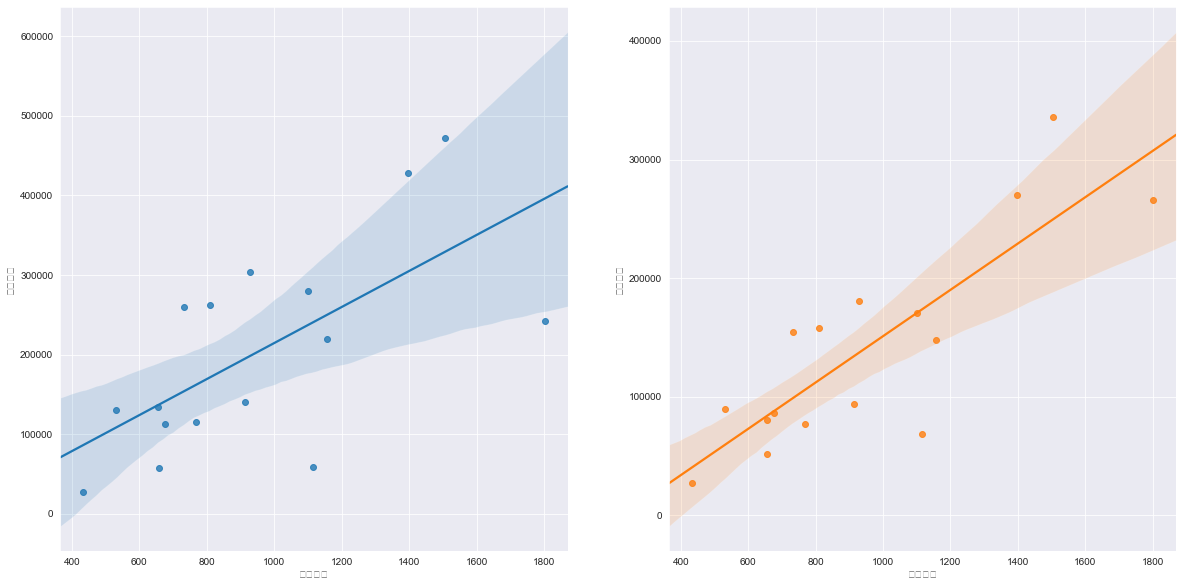

In [50]:
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='운행횟수',
           y='통화건수',
           data=morning_total,
           ax=ax1)


sns.regplot(x='운행횟수',
           y='통화건수',
           data=night_total,
           ax=ax2)
plt.show()

In [51]:
morning_total_drop=morning_total.drop(['기장군','강서구'])
morning_total_drop

,유동인구,통화건수,운행횟수
시군구,,,
금정구,13029.085869,140648,914
남구,13226.836526,259813,733
동구,8189.684530,57698,657
동래구,18772.568679,304233,928
부산진구,17482.949379,428752,1396
북구,17144.122013,262261,810
사상구,23589.145068,219318,1156
사하구,19202.348113,280307,1101
서구,8280.623832,112800,676


In [55]:
result_n = sm.ols(formula = '통화건수 ~ 운행횟수 + 유동인구', data = morning_total_drop).fit()
print(result_n.summary())

                            OLS Regression Results                            
Dep. Variable:                   통화건수   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     21.72
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           0.000151
Time:                        14:39:02   Log-Likelihood:                -173.24
No. Observations:                  14   AIC:                             352.5
Df Residuals:                      11   BIC:                             354.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.443e+05   5.96e+04     -2.420      0.0

In [ ]:
.

